# AM QAM FDM

## Objective

This experiment aims:

1. To study and practice the generation and demodulation of AM wave.

2. To study and practice the generation and demodulation of QAM wave.

3. To study and practice the FDM technique.


## Introduction

In this experiment, you will practice AM, QAM and FDM techniqus.
Please refer to the textbook and lecture notes for theory part.

## Procedure

### Amplitude Modulation: Generation and Detection

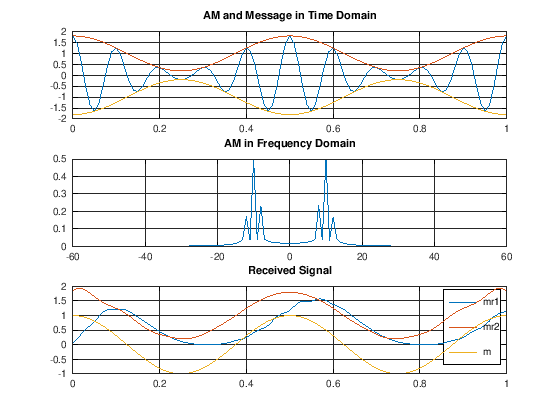

In [ ]:
clear all;

fs   = 1e2;               % sampling frequency
t    =  0 : 1/fs : 1;     % time vector
f    = -fs/2 : 1 : fs/2;  % frequency vector
fc   = 10;                % carrier frequency
fm   = 2;                 % message frequency
m    = cos(2*pi*fm*t);    % message signal
c    = cos(2*pi*fc*t);    % carrier signal
u    = 0.8;               % modulation index
dsb  = u*m .* c;          % DSB-SC signal
am   = dsb + c;           % AM signal
AM   = sig_spec(am);

% Demodulation using envelope detection
% envelope detection can be implemented by squaring and lowpass filtering
amsq   = am .* am;
pkg load signal;
[b, a] = butter(2,2*fm/(fs/2));
mr1     = filter(b, a, amsq);

% envelope detection also can be implemented using Hilbert transfom
mr2     = abs(hilbert(am));


figure();
subplot(311); plot(t,am); grid on; title('AM and Message in Time Domain')
hold on;
subplot(311); plot(t,u*m+1); grid on;hold on;
subplot(311); plot(t,-u*m-1); grid on;
subplot(312); plot(f,AM); grid on; title('AM in Frequency Domain')
subplot(313); plot(t,mr1); grid on; title('Received Signal')
hold on;
subplot(313); plot(t,mr2);
hold on;
subplot(313); plot(t,m); grid on;
legend('mr1','mr2','m')

---

### Modulation Power Efficiency  

In [ ]:
% Power efficiency of modulation
% eta = Psidebands / (Pcarrier + Psidebands)
Ps  = sum(dsb .* dsb) / fs
Pt  = sum(am .* am) / fs
eta = Ps / Pt

Ps =  0.16640
Pt =  0.69240
eta =  0.24032


Discussion

* Use different values of modulation index and comment on its affect upon power efficiency and detection capability

---

### QAM: Generation

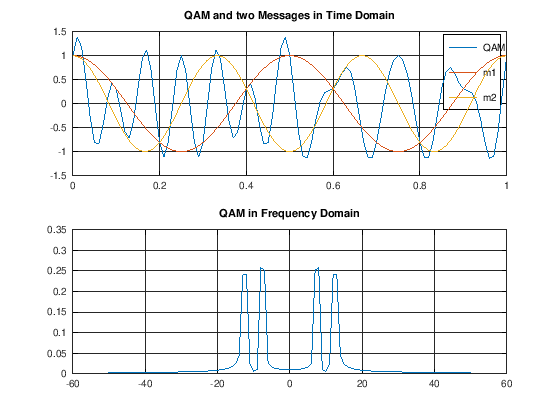

In [ ]:
fm1 = 2;                    % first message frequency
fm2 = 3;                    % second message frequency
c2  = cos(2*pi*fc*t-pi/2);  % second carrier signal
m1  = cos(2*pi*fm1*t);      % first message signal
m2  = cos(2*pi*fm2*t);      % second message signal
qam = m1.*c + m2.*c2;       % QAM signal
QAM = sig_spec(qam);

figure();
subplot(211); plot(t,qam); grid on; title('QAM and two Messages in Time Domain')
hold on;
subplot(211); plot(t,m1); grid on;hold on;
subplot(211); plot(t,m2); grid on;
legend('QAM','m1','m2')
subplot(212); plot(f,QAM); grid on; title('QAM in Frequency Domain')

---

### QAM: Receiver

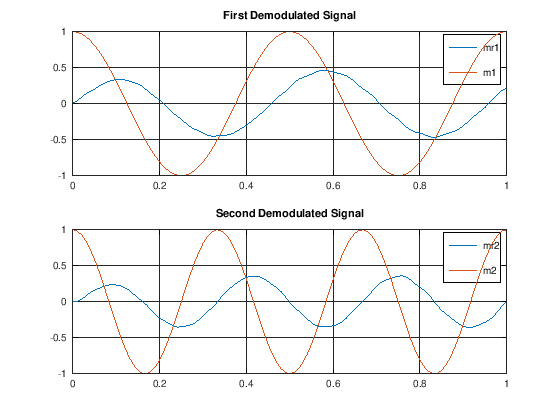

In [ ]:
lo1  = cos(2*pi*fc*t);
lo2  = cos(2*pi*fc*t-pi/2);
r1   = lo1.*qam;
r2   = lo2.*qam;
R1   = sig_spec(r1);
R2   = sig_spec(r2);

pkg load signal;
[b, a] = butter(2,fm2/(fs/2));
mr1    = filter(b,a,r1);
mr2    = filter(b,a,r2);
Mr1    = sig_spec(mr1);
Mr2    = sig_spec(mr2);

figure();
subplot(211); plot(t,mr1); grid on; title('First Demodulated Signal')
hold on;
subplot(211); plot(t,m1); grid on;
legend('mr1','m1')
subplot(212); plot(t,mr2); grid on; title('Second Demodulated Signal')
hold on;
subplot(212); plot(t,m2); grid on;
legend('mr2','m2')

Discussion

* Try to insert a phase error at the demodulation and comment on its affect upon detected signal.

* What happen if the phase difference between demodulator and carrier was $\pi/2$.

---

### FDM

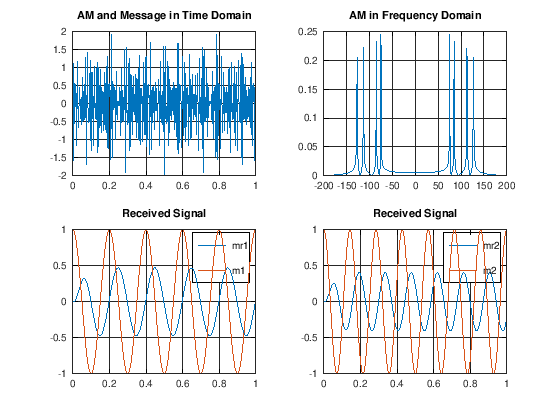

In [ ]:
clear all;

fs   = 4e2;               % sampling frequency
t    =  0 : 1/fs : 1;     % time vector
f    = -fs/2 : 1 : fs/2;  % frequency vector
fc1  = 80;                % first carrier frequency
fm1  = 5;                 % first message frequency
fc2  = 120;               % second carrier frequency
fm2  = 7;                 % second message frequency
m1   = cos(2*pi*fm1*t);   % first message signal
m2   = cos(2*pi*fm2*t);   % second message signal
c1   = cos(2*pi*fc1*t);   % first carrier signal
c2   = cos(2*pi*fc2*t);   % second carrier signal
fdm  = m1.*c1 + m2.*c2;   % FDM of two DSB-SC signals
FDM  = sig_spec(fdm);     % Spectrum of FDM of two DSB-SC signals 

pkg load signal;
[b1, a1] = butter(2,[fc1-10 fc1+10]/(fs/2)); % first bandpass filter
[b2, a2] = butter(2,[fc2-10 fc2+10]/(fs/2)); % second bandpass filter

r1       = filter(b1, a1, fdm); % extracting the first signal
r2       = filter(b2, a2, fdm); % extracting the second signal

% Coherent detection of two DSB-SC signals
dr1      = r1.*c1;
dr2      = r2.*c2;

[b, a] = butter(2,2*fm1/(fs/2));
mr1       = filter(b, a, dr1);
mr2       = filter(b, a, dr2);


figure();
subplot(221); plot(t,fdm); grid on; title('FDM in Time Domain')
subplot(222); plot(f,FDM); grid on; title('FDM in Frequency Domain')
subplot(223); plot(t,mr1); grid on; title('First Received Signal')
hold on;
subplot(223); plot(t,m1);
legend('mr1','m1')
subplot(224); plot(t,mr2); grid on; title('Second Received Signal')
hold on;
subplot(224); plot(t,m2); grid on;
legend('mr2','m2')

Discussion

* Try to make carriers as much as closer in frequency without interfering the modulating signals with each other.

* Comment on the guard band requirement versus the filter order.